# 5 서포트 벡터 머신

# 5.1 선형 SVM 분류

* SVM분류기는 large margin classification이라고도 불린다.  
* SVM은 선형이나 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델이다.  
    * SVM은 특성의 스케일에 민감하다. ~ 사이킷 런의 standardscaler를 사용할 필요 있음.

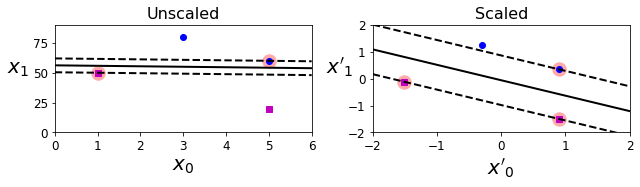

## 5.1.1 소프트 마진 분류

* 모든 샘플이 도로 바깥쪽에 올바르게 분류되어 있다면 이를 **하드 마진 분류(hard margin classification)**라고 한다. 
    
    * 하드마진 분류의 문제점
    1. 데이터가 선형적으로 구분될 수 있어야 제대로 작동한다.  
    2. 이상치에 민감하다.

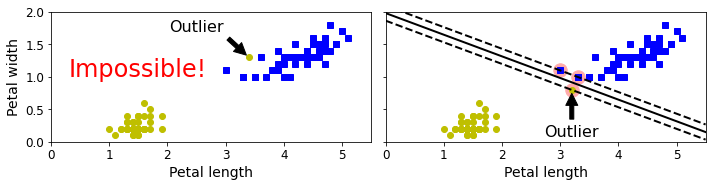

* 도로의 폭을 유지하는 것과 마진 오류 사이의 적절한 균형이 필요하다.=> **소프트 마진 분류(soft margin classification)**

* 아래 그림에서 왼쪽은 마진 오류가 많지만, 일반화 가능성이 높아보인다.  
* 만약 SVM모델이 과대적합이라면, 하이퍼파라미터 C를 감소시켜 모델을 규제할 수 있다.

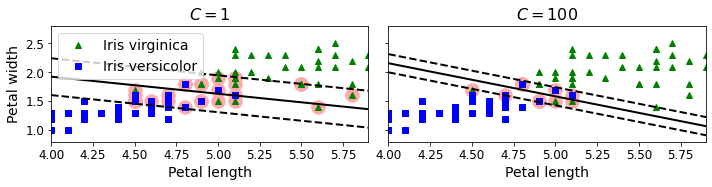

In [17]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib as mpl
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [4]:
svm_clf.predict([[5.5, 1.7]]) #예측을 진행
#SVM분류기는 클래스에 대한 확률 제공 하지 않음!

array([1.])

# 5.2 비선형 SVM 분류

* 비선형 데이터셋 다루기 -> 다항 특성과 같은 특성을 추가.  
* 아래 그림처럼 두번째 특성을 추가하여, 2차원 데이터셋으로 만들 수 있다.  
    

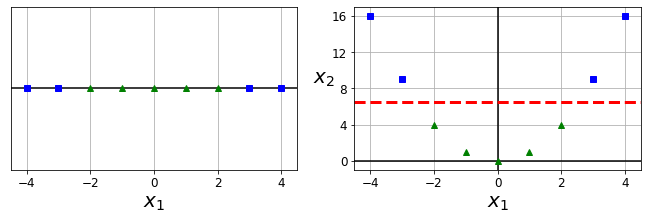

In [9]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise = 0.15)

#파이프라인 만들기
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

C:\Users\Minki\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

## 5.2.1 다항식 커널

* 낮은 차수의 다항식은 복잡한 데이터셋 표현 못하고, 높은 차수의 다항식은 모델을 느리게 만들 수 있다.
* SVM에선 **커널 트릭(kernel trick)**을 사용하여 특성을 추가하지 않으면서, 다항식 특성을 추가한 것과 같은 결과를 낼 수 있다.

In [10]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) #3차 다항식 커널을 사용 , degree=n에서 n은 n차 다항식을 의미
])#coef0는 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절.
poly_kernel_svm_clf.fit(X, y) #과소적합이면 다항식의 차수를 늘리고, 과대적합이면 차수를 줄인다.

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

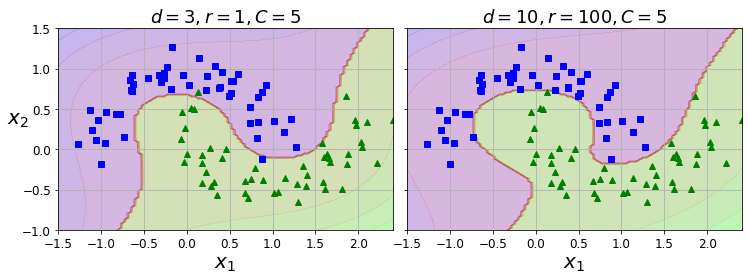

## 5.2.2 유사도 특성

* 비선형 특성 다루기 -> **유사도 함수**로 계산한 특성을 추가
* 유사도 함수: 각 샘플이 특정 **랜드마크**와 얼마나 닮았는지 측정
    * 랜드마크는 어떻게 선택할까?  
        간단한 방법: 데이터셋에 있는 모든 샘플 위치에 랜드마크를 설정.=> 차원이 매우 커지고, 선형적 구분 가능    
        단점: 훈련 세트에 있는 n개의 특성을 가진 m개의 샘플이 m개의 특성을 가진 m개의 샘플로 변환.  
             (동일한 크기의 아주 많은 특성들이 만들어진다)

* 본 예제에서는 가우시안 RBF(방사 기저 함수, radial basis function)를 유사도 함수로 정의.  
    * 0부터 1사이의 값을 가지며  
    0=랜드마크에서 아주 멀 경우, 1=랜드마크와 같은 위치일 경우 를 말한다.

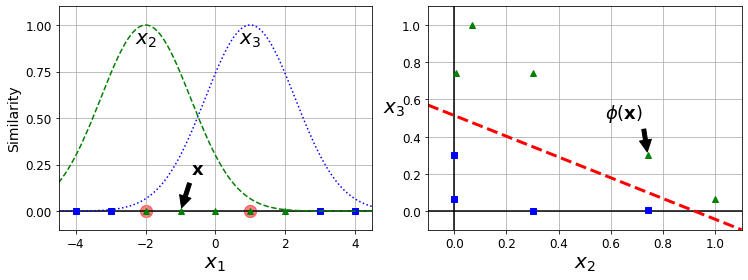

## 5.2.3 가우시안 RBF커널

* 특성을 추가하면 비용이 많이 든다. -> 커널 트릭을 이용하면 유사도 특성을 많이 추가하는 것과 비슷한 결과를 얻을 수 있다.

In [11]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

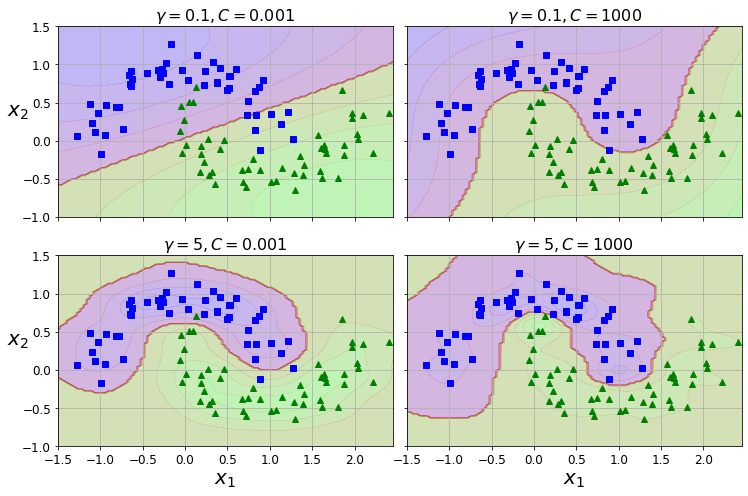

* 감마값이 작아지면 결정 경계가 부드러워지고, 감마값이 커지면 결졍 경계가 불규칙하고 휘어진다.  
* 하이퍼파라미터 감마가 규제하는 역할을 할 수 있다.  
* 모델이 과대적합인 경우 감마를 감소시키고, 과소적합인 경우 증가시킨다.(하이퍼파라미터 C와 유사함)  
--- 
* 다른 커널들,,,  
    * 문자열 커널(string kernel): 텍스트 문서나 DNA 서열을 분류할 때 사용된다.
    * 선형 커널(linear kernel)  
    * 다항식 커널(polynominal kernel)  
    * 시그모이드 커널(sigmoid kernel)

## 5.2.4 계산 복잡도

* LinearSVC는 liblinear라이브러리를 기반으로 한다.  
    * liblinear라이브러리는 커널 트릭 지원하지 않는다. 훈련시간 복잡도는 대략 $O$(m x n)  
--- 
정밀도를 높이면 수행시간이 늘어난다.  
정밀도는 소프트 마진 SVM에선 $\epsilon$으로 조절 할 수 있다. -> 사이킷런에서는 매개변수 tol  

--- 
* SVC는 커널 트릭 알고리즘을 구현한 libsvm 라이브러리를 기반으로 한다.-> 훈련 샘플 수가 커지면 엄청나게 느려진다.  
    * 희소 특성인 경우에는, 알고리즘의 성능이 샘플이 가진 0이 아닌 특성의 평균 수에 거의 비례.

# 5.3 SVM 회귀

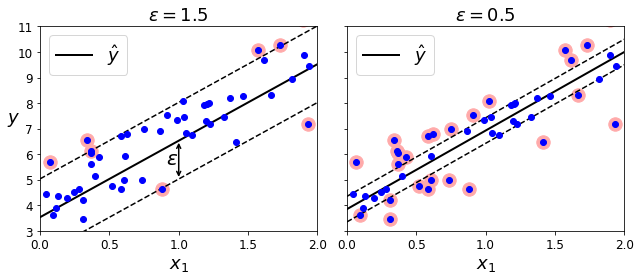

왼쪽은 마진을 크게, 오른쪽은 마진을 작게 설정하였다.  
마진 안에서는 훈련 샘플이 추가되어도 모델의 예측에는 영향이 없는데, 이러한 모델을 **$\epsilon$에 민감하지 않다**고 한다.($\epsilon$-negative)

In [13]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

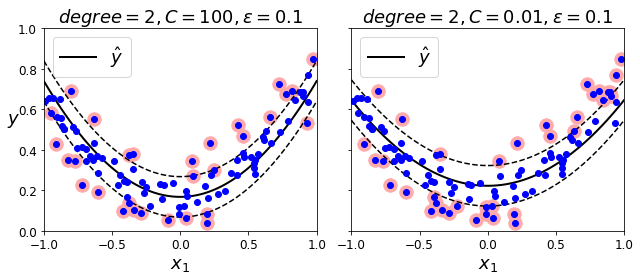

위 그림은 다항 커널을 사용한 SVM회귀이다.  
왼쪽은 규제가 없고(C가 아주 큰 값), 오른쪽은 규제가 많다.

In [22]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1) #SVR은 SVC의 회귀버전이다.
#LinearSVR은 LinearSVC의 회귀버전이다.

# 5.4 SVM 이론

## 5.4.1 결정 함수와 예측

* 선형 SVM 분류기 모델은 $w^Tx + b$를 계산한 값이 0보다 크면 양성클래스, 아니면 음성으로 분류클래스로 분류한다.
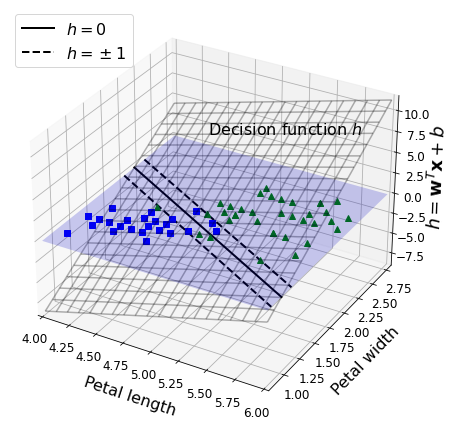

위 그림은 선형 SVM의 결정함수를 나타낸 것이다.  
데이터의 특성이 2개 -> 2차원 평면으로 나타낼 수 있다.  
결정 경계는 검정 실선이고, 검은 점선이 마진을 형성하고 있다.  
---
**SVM을 훈련한다** -> 가능한 한 마진을 크게하는 $w$와 $b$를 찾는 것이다.

## 5.4.2 목적함수

* 결정함수의 기울기는 $||w||$이다-> 가중치 벡터 $w$가 작을수록 마진은 커지기 때문에, 마진을 크게하기위해 $w$를 minimize한다.  
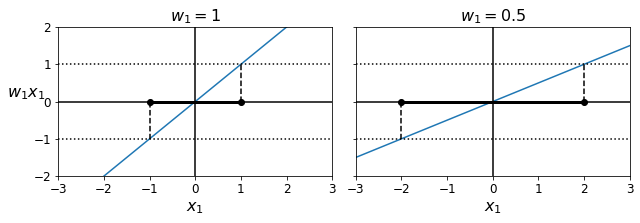
--- 
* 하드마진 선형 SVM 분류기 목적함수  
    * $minimize{1\over 2}w^Tw$
--- 
* 소프트마진 선형 SVM 분류기 목적함수  
    * $minimize{1\over 2}w^Tw + C\sum_{i=1}^m\zeta^{(i)}$  
    * slack variable($\zeta$) -> 얼마나 봐줄까(마진을 얼마나 위반할까)정해준다. 당연히 0보다 크거나 같음.
--- 
* 식 앞에 $1 \over 2$는 왜 붙을까?  
    * 미분했을 때, 앞에 2가 붙어서 1/2를 곱해주면 더 깔끔한 식이 된다?

## 5.4.3 콰드라틱 프로그래밍

하드 마진과 소프트 마진은 모두 볼록 함수의 이차 최적화 문제(**콰드라틱 프로그래밍 , quadratic programming**)

## 5.4.4 쌍대문제

## 5.4.5 커널 SVM

머신러닝에서 커널은 변환 $\phi$를 계산하지 않고(모르더라도) 원래 벡터 **a**와 **b**에 기반하여 점곱 $\phi(a)^T\phi(b)$를 계산할 수 있는 함수이다.

* 일반적인 커널  
    * 선형: $K(a,b) = a^Tb$
    * 다항식: $K(a,b) = (\gamma a^Tb+ r)^d$
    * 가우시안 RBF: $K(a,b) = \exp (-\gamma ||a-b||^2)$
    * 시그모이드: $K(a,b) = tan(\gamma a^Tb + r)$

## 5.4.6 온라인 SVM

* 선형 SVM 분류기 비용함수 
    * $J(w, b) = {1\over 2}w^Tw + C\sum_{i=1}^mmax(0, 1-t^{(i)}(w^Tx^{(i)}+b))$  
    * 첫 항은 벡터w에 제약을 가하여 마진을 크게,  
    * 두번째 항은 모든 마진 오류를 계산.(방향을 고려하여, 올바른 방향으로 벗어나면 마진오류는 0이다)

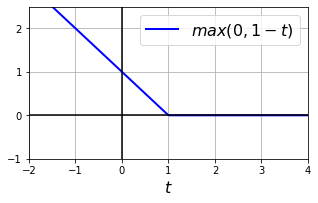

In [24]:
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

plt.figure(figsize=(5,2.8))
plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - t)$")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$t$", fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=16)
plt.show()

위 그림은 힌지 손실(hinge loss)함수를 나타낸 것이다. t가 1보다 크거나 같으면 0이다. 